In [ ]:
# flag to modify everything to run better on Colab; change it to true if you want to run on colab
# use_colab = False
use_colab = True

In [ ]:
# uncomment for running on colab
!pip install -e .

Obtaining file:///content
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 /usr/local/lib/python3.7/dist-packages/pip/_vendor/pep517/in_process/_in_process.py get_requires_for_build_wheel /tmp/tmpqcahb_f8 Check the logs for full command output.


In [ ]:
# mount your Google Drive to access the zip file
from google.colab import drive
drive.mount('/content/drive' )

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/CS_7641_ML_Project/combined.zip

In [ ]:
import os

import torch

from runner import Trainer
from optimizer import get_optimizer
from simple_net import SimpleNet
from simple_net_final import SimpleNetFinal
from my_resnet import MyResNet18
from multilabel_resnet import MultilabelResNet18
from my_optimal_net import OptimalNet
from data_transforms import (
    get_fundamental_transforms,
    get_fundamental_normalization_transforms,
    get_fundamental_augmentation_transforms,
    get_all_transforms,
)
from stats_helper import compute_mean_and_std
from confusion_matrix import (
    generate_confusion_data,
    generate_confusion_matrix,
    plot_confusion_matrix,
    get_pred_images_for_target,
    generate_and_plot_confusion_matrix,
    generate_and_plot_accuracy_table,
)
from dl_utils import save_trained_model_weights

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
is_cuda = True
is_cuda = (
    is_cuda and torch.cuda.is_available()
)  # will turn off cuda if the machine doesnt have a GPU

In [ ]:
data_path = "./data/" if not use_colab else "./data/"
model_path = "../model_checkpoints/" if not use_colab else "./model_checkpoints/"

In [ ]:
# dataset_mean, dataset_std = compute_mean_and_std(data_path)
dataset_mean, dataset_std = 0.36668006, 0.51483374

In [ ]:
inp_size = (224, 224)

In [ ]:
my_resnet = MyResNet18()
print(my_resnet)
print(sum(p.numel() for p in my_resnet.parameters()))

MyResNet18(
  (conv_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stat

In [ ]:
optimizer_config = {"optimizer_type": "sgd", "lr": 5e-3, "weight_decay": 0, "momentum": 0.9} # Train Accuracy: 0.7549 Validation Accuracy: 0.3928

In [ ]:
my_resnet = MyResNet18()
optimizer = get_optimizer(my_resnet, optimizer_config)

# # loading from colab for confusion matrices
# path = "/home/jer/grad/CV/project-4/src/vision/trained_MyResNet18_final.pt"
# my_resnet.load_state_dict(torch.load(path, map_location=torch.device('cpu')), strict=False)
# my_resnet.load_state_dict(torch.load(path))


trainer = Trainer(
    data_dir=data_path,
    model=my_resnet,
    optimizer=optimizer,
    model_dir=os.path.join(model_path, "resnet18"),
    train_data_transforms=get_all_transforms(inp_size, dataset_mean, dataset_std),
    val_data_transforms=get_fundamental_normalization_transforms(
        inp_size, dataset_mean, dataset_std),
    batch_size=32,
    load_from_disk=False,
    cuda=is_cuda,
)

In [ ]:
%%time
# trainer.run_training_loop(num_epochs=25)
trainer.run_training_loop(num_epochs=5)

# trainer.validate()

Epoch:1 Train Loss:1.6629 Val Loss: 2.5302 Train Accuracy: 0.4233 Validation Accuracy: 0.2671
Epoch:2 Train Loss:1.0202 Val Loss: 2.9544 Train Accuracy: 0.6533 Validation Accuracy: 0.2749
Epoch:3 Train Loss:0.9019 Val Loss: 2.6460 Train Accuracy: 0.6936 Validation Accuracy: 0.2710
Epoch:4 Train Loss:0.7505 Val Loss: 2.7389 Train Accuracy: 0.7469 Validation Accuracy: 0.3177
Epoch:5 Train Loss:0.7230 Val Loss: 3.4126 Train Accuracy: 0.7557 Validation Accuracy: 0.2725
CPU times: user 4min 21s, sys: 8 s, total: 4min 29s
Wall time: 14min 21s


Learning Rate:  1e-05
Weight Decay:  0
Epoch:1 Train Loss:2.3120 Val Loss: 2.3069 Train Accuracy: 0.1191 Validation Accuracy: 0.1339
Epoch:2 Train Loss:2.2907 Val Loss: 2.2956 Train Accuracy: 0.1378 Validation Accuracy: 0.1416
Epoch:3 Train Loss:2.2738 Val Loss: 2.2858 Train Accuracy: 0.1559 Validation Accuracy: 0.1427
Epoch:4 Train Loss:2.2574 Val Loss: 2.2808 Train Accuracy: 0.1799 Validation Accuracy: 0.1520
Epoch:5 Train Loss:2.2426 Val Loss: 2.2746 Train Accuracy: 0.2028 Validation Accuracy: 0.1550
Epoch:6 Train Loss:2.2251 Val Loss: 2.2670 Train Accuracy: 0.2315 Validation Accuracy: 0.1606
Epoch:7 Train Loss:2.2099 Val Loss: 2.2592 Train Accuracy: 0.2595 Validation Accuracy: 0.1685
Epoch:8 Train Loss:2.1928 Val Loss: 2.2516 Train Accuracy: 0.2869 Validation Accuracy: 0.1759
Epoch:9 Train Loss:2.1733 Val Loss: 2.2413 Train Accuracy: 0.3177 Validation Accuracy: 0.1885
Epoch:10 Train Loss:2.1516 Val Loss: 2.2323 Train Accuracy: 0.3496 Validation Accuracy: 0.1957
Train Accuracy = 0.3

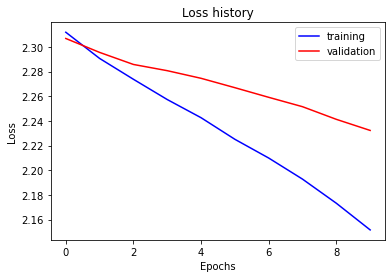

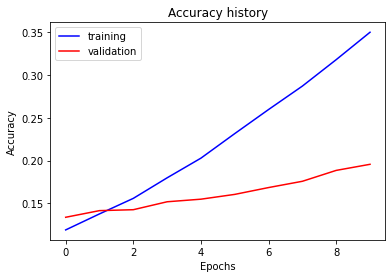

Learning Rate:  0.0001
Weight Decay:  0
Epoch:1 Train Loss:2.2323 Val Loss: 2.2409 Train Accuracy: 0.2152 Validation Accuracy: 0.1767
Epoch:2 Train Loss:1.9974 Val Loss: 2.0765 Train Accuracy: 0.5048 Validation Accuracy: 0.2867
Epoch:3 Train Loss:1.5230 Val Loss: 1.7381 Train Accuracy: 0.7222 Validation Accuracy: 0.4929
Epoch:4 Train Loss:0.9844 Val Loss: 1.4721 Train Accuracy: 0.8305 Validation Accuracy: 0.5435
Epoch:5 Train Loss:0.5995 Val Loss: 1.2890 Train Accuracy: 0.8947 Validation Accuracy: 0.5786
Epoch:6 Train Loss:0.3890 Val Loss: 1.1964 Train Accuracy: 0.9293 Validation Accuracy: 0.5986
Epoch:7 Train Loss:0.2774 Val Loss: 1.1581 Train Accuracy: 0.9481 Validation Accuracy: 0.6044
Epoch:8 Train Loss:0.2125 Val Loss: 1.1333 Train Accuracy: 0.9604 Validation Accuracy: 0.6113
Epoch:9 Train Loss:0.1647 Val Loss: 1.1282 Train Accuracy: 0.9695 Validation Accuracy: 0.6156
Epoch:10 Train Loss:0.1329 Val Loss: 1.1077 Train Accuracy: 0.9760 Validation Accuracy: 0.6268
Train Accuracy = 0.

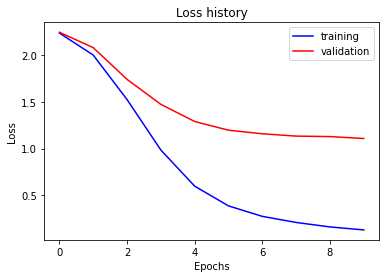

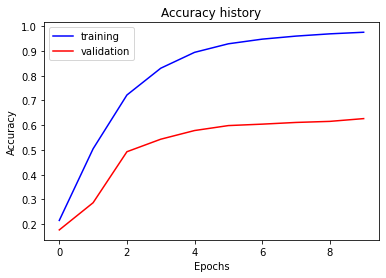

Learning Rate:  0.001
Weight Decay:  0
Epoch:1 Train Loss:1.0391 Val Loss: 1.3267 Train Accuracy: 0.7114 Validation Accuracy: 0.5570
Epoch:2 Train Loss:0.0906 Val Loss: 1.4259 Train Accuracy: 0.9809 Validation Accuracy: 0.5596
Epoch:3 Train Loss:0.0392 Val Loss: 1.2948 Train Accuracy: 0.9917 Validation Accuracy: 0.5885
Epoch:4 Train Loss:0.0237 Val Loss: 1.2817 Train Accuracy: 0.9951 Validation Accuracy: 0.6126
Epoch:5 Train Loss:0.0152 Val Loss: 1.3583 Train Accuracy: 0.9972 Validation Accuracy: 0.5981
Epoch:6 Train Loss:0.0112 Val Loss: 1.3142 Train Accuracy: 0.9975 Validation Accuracy: 0.6061
Epoch:7 Train Loss:0.0089 Val Loss: 1.3620 Train Accuracy: 0.9985 Validation Accuracy: 0.6003
Epoch:8 Train Loss:0.0068 Val Loss: 1.3645 Train Accuracy: 0.9987 Validation Accuracy: 0.6042
Epoch:9 Train Loss:0.0067 Val Loss: 1.3591 Train Accuracy: 0.9985 Validation Accuracy: 0.6106
Epoch:10 Train Loss:0.0052 Val Loss: 1.3994 Train Accuracy: 0.9992 Validation Accuracy: 0.6087
Train Accuracy = 0.9

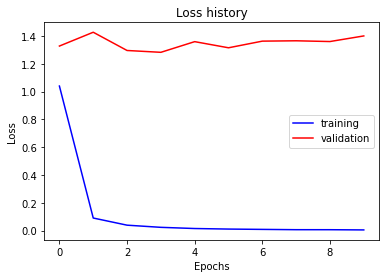

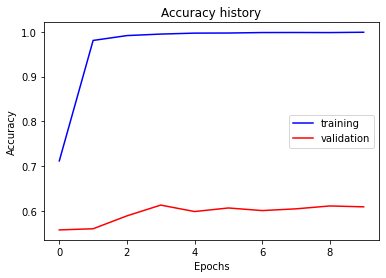

Learning Rate:  0.01
Weight Decay:  0
Epoch:1 Train Loss:0.3289 Val Loss: 1.1412 Train Accuracy: 0.8932 Validation Accuracy: 0.6793
Epoch:2 Train Loss:0.0436 Val Loss: 0.9125 Train Accuracy: 0.9879 Validation Accuracy: 0.7350
Epoch:3 Train Loss:0.0250 Val Loss: 0.9204 Train Accuracy: 0.9926 Validation Accuracy: 0.7174
Epoch:4 Train Loss:0.0173 Val Loss: 1.2103 Train Accuracy: 0.9953 Validation Accuracy: 0.7004
Epoch:5 Train Loss:0.0135 Val Loss: 1.5226 Train Accuracy: 0.9962 Validation Accuracy: 0.6446
Epoch:6 Train Loss:0.0065 Val Loss: 1.5879 Train Accuracy: 0.9981 Validation Accuracy: 0.6457
Epoch:7 Train Loss:0.0069 Val Loss: 1.2909 Train Accuracy: 0.9979 Validation Accuracy: 0.6743
Epoch:8 Train Loss:0.0060 Val Loss: 1.5505 Train Accuracy: 0.9984 Validation Accuracy: 0.6560
Epoch:9 Train Loss:0.0024 Val Loss: 1.7490 Train Accuracy: 0.9993 Validation Accuracy: 0.6429
Epoch:10 Train Loss:0.0046 Val Loss: 1.5974 Train Accuracy: 0.9985 Validation Accuracy: 0.6715
Train Accuracy = 0.99

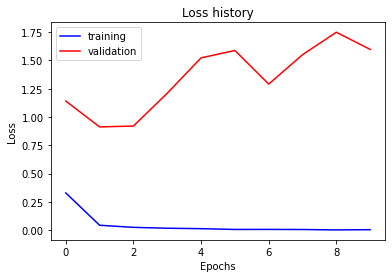

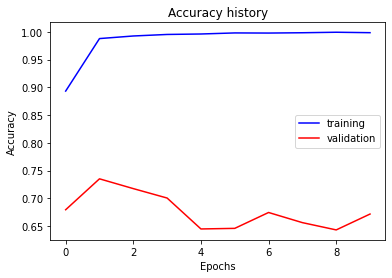

Learning Rate:  0.1
Weight Decay:  0
Epoch:1 Train Loss:2.2944 Val Loss: 2.3047 Train Accuracy: 0.1163 Validation Accuracy: 0.1162
Epoch:2 Train Loss:2.3057 Val Loss: 2.3127 Train Accuracy: 0.1053 Validation Accuracy: 0.1048
Epoch:3 Train Loss:2.3061 Val Loss: 2.3069 Train Accuracy: 0.1062 Validation Accuracy: 0.1162
Epoch:4 Train Loss:2.3064 Val Loss: 2.3084 Train Accuracy: 0.1060 Validation Accuracy: 0.0932
Epoch:5 Train Loss:2.3066 Val Loss: 2.3057 Train Accuracy: 0.1039 Validation Accuracy: 0.1005
Epoch:6 Train Loss:2.3068 Val Loss: 2.3082 Train Accuracy: 0.1023 Validation Accuracy: 0.1005
Epoch:7 Train Loss:2.3075 Val Loss: 2.3060 Train Accuracy: 0.1019 Validation Accuracy: 0.1162
Epoch:8 Train Loss:2.3050 Val Loss: 2.3207 Train Accuracy: 0.1080 Validation Accuracy: 0.0990
Epoch:9 Train Loss:2.3075 Val Loss: 2.3104 Train Accuracy: 0.1029 Validation Accuracy: 0.0997
Epoch:10 Train Loss:2.3061 Val Loss: 2.3070 Train Accuracy: 0.1106 Validation Accuracy: 0.0932
Train Accuracy = 0.110

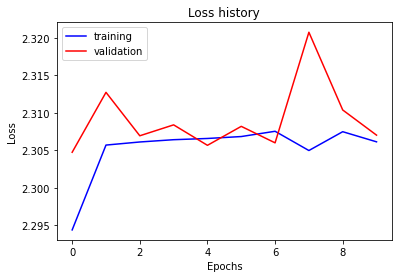

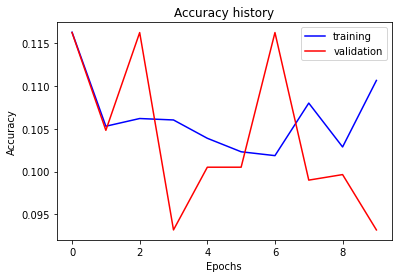

Learning Rate:  1e-05
Weight Decay:  1e-08
Epoch:1 Train Loss:2.3182 Val Loss: 2.3002 Train Accuracy: 0.0871 Validation Accuracy: 0.1341
Epoch:2 Train Loss:2.3010 Val Loss: 2.2917 Train Accuracy: 0.1096 Validation Accuracy: 0.1410
Epoch:3 Train Loss:2.2878 Val Loss: 2.2860 Train Accuracy: 0.1325 Validation Accuracy: 0.1537
Epoch:4 Train Loss:2.2754 Val Loss: 2.2807 Train Accuracy: 0.1524 Validation Accuracy: 0.1543
Epoch:5 Train Loss:2.2614 Val Loss: 2.2765 Train Accuracy: 0.1809 Validation Accuracy: 0.1636
Epoch:6 Train Loss:2.2505 Val Loss: 2.2695 Train Accuracy: 0.2001 Validation Accuracy: 0.1608
Epoch:7 Train Loss:2.2358 Val Loss: 2.2650 Train Accuracy: 0.2269 Validation Accuracy: 0.1657
Epoch:8 Train Loss:2.2221 Val Loss: 2.2583 Train Accuracy: 0.2612 Validation Accuracy: 0.1703
Epoch:9 Train Loss:2.2072 Val Loss: 2.2511 Train Accuracy: 0.2854 Validation Accuracy: 0.1731
Epoch:10 Train Loss:2.1907 Val Loss: 2.2442 Train Accuracy: 0.3166 Validation Accuracy: 0.1763
Train Accuracy =

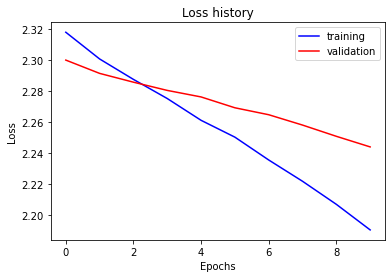

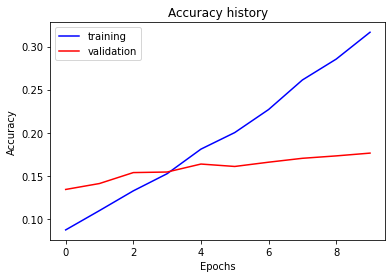

Learning Rate:  0.0001
Weight Decay:  1e-08
Epoch:1 Train Loss:2.2394 Val Loss: 2.2496 Train Accuracy: 0.2152 Validation Accuracy: 0.1672
Epoch:2 Train Loss:2.0093 Val Loss: 2.0771 Train Accuracy: 0.5078 Validation Accuracy: 0.3638
Epoch:3 Train Loss:1.5172 Val Loss: 1.7315 Train Accuracy: 0.7032 Validation Accuracy: 0.4944
Epoch:4 Train Loss:0.9655 Val Loss: 1.4686 Train Accuracy: 0.8301 Validation Accuracy: 0.5224
Epoch:5 Train Loss:0.5924 Val Loss: 1.3471 Train Accuracy: 0.8982 Validation Accuracy: 0.5282
Epoch:6 Train Loss:0.3859 Val Loss: 1.2723 Train Accuracy: 0.9309 Validation Accuracy: 0.5398
Epoch:7 Train Loss:0.2776 Val Loss: 1.2284 Train Accuracy: 0.9475 Validation Accuracy: 0.5553
Epoch:8 Train Loss:0.2088 Val Loss: 1.2657 Train Accuracy: 0.9605 Validation Accuracy: 0.5409
Epoch:9 Train Loss:0.1649 Val Loss: 1.2511 Train Accuracy: 0.9699 Validation Accuracy: 0.5482
Epoch:10 Train Loss:0.1343 Val Loss: 1.2121 Train Accuracy: 0.9746 Validation Accuracy: 0.5573
Train Accuracy 

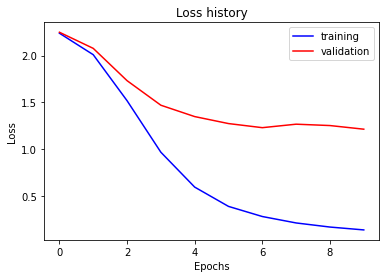

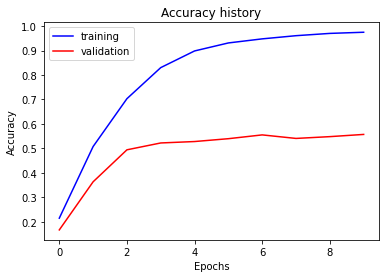

Learning Rate:  0.001
Weight Decay:  1e-08
Epoch:1 Train Loss:0.9915 Val Loss: 1.2830 Train Accuracy: 0.7271 Validation Accuracy: 0.5732
Epoch:2 Train Loss:0.0886 Val Loss: 1.4214 Train Accuracy: 0.9812 Validation Accuracy: 0.5738
Epoch:3 Train Loss:0.0368 Val Loss: 1.3474 Train Accuracy: 0.9933 Validation Accuracy: 0.6016
Epoch:4 Train Loss:0.0229 Val Loss: 1.3990 Train Accuracy: 0.9953 Validation Accuracy: 0.5919
Epoch:5 Train Loss:0.0150 Val Loss: 1.3594 Train Accuracy: 0.9972 Validation Accuracy: 0.6190
Epoch:6 Train Loss:0.0102 Val Loss: 1.4409 Train Accuracy: 0.9978 Validation Accuracy: 0.6037
Epoch:7 Train Loss:0.0083 Val Loss: 1.4484 Train Accuracy: 0.9987 Validation Accuracy: 0.6031
Epoch:8 Train Loss:0.0065 Val Loss: 1.3566 Train Accuracy: 0.9990 Validation Accuracy: 0.6356
Epoch:9 Train Loss:0.0046 Val Loss: 1.5427 Train Accuracy: 0.9994 Validation Accuracy: 0.5846
Epoch:10 Train Loss:0.0035 Val Loss: 1.4961 Train Accuracy: 0.9997 Validation Accuracy: 0.6050
Train Accuracy =

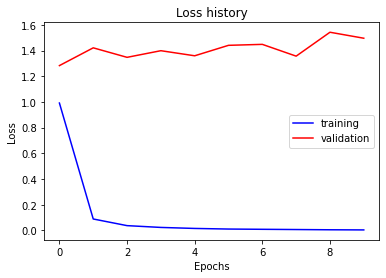

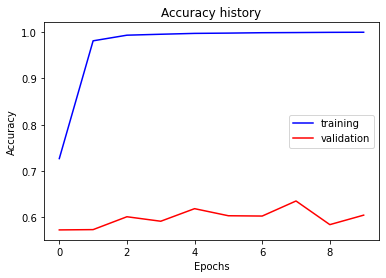

Learning Rate:  0.01
Weight Decay:  1e-08
Epoch:1 Train Loss:0.3022 Val Loss: 0.9997 Train Accuracy: 0.8999 Validation Accuracy: 0.6896
Epoch:2 Train Loss:0.0376 Val Loss: 0.9835 Train Accuracy: 0.9893 Validation Accuracy: 0.7322
Epoch:3 Train Loss:0.0301 Val Loss: 1.2929 Train Accuracy: 0.9907 Validation Accuracy: 0.6713
Epoch:4 Train Loss:0.0145 Val Loss: 1.0827 Train Accuracy: 0.9956 Validation Accuracy: 0.7187
Epoch:5 Train Loss:0.0099 Val Loss: 1.2304 Train Accuracy: 0.9971 Validation Accuracy: 0.7000
Epoch:6 Train Loss:0.0090 Val Loss: 1.2120 Train Accuracy: 0.9972 Validation Accuracy: 0.6987
Epoch:7 Train Loss:0.0081 Val Loss: 0.9885 Train Accuracy: 0.9978 Validation Accuracy: 0.7361
Epoch:8 Train Loss:0.0052 Val Loss: 1.2619 Train Accuracy: 0.9987 Validation Accuracy: 0.7047
Epoch:9 Train Loss:0.0050 Val Loss: 1.1186 Train Accuracy: 0.9989 Validation Accuracy: 0.7337
Epoch:10 Train Loss:0.0018 Val Loss: 1.3434 Train Accuracy: 0.9996 Validation Accuracy: 0.7075
Train Accuracy = 

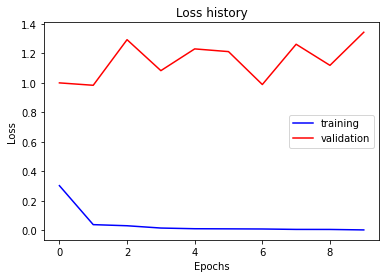

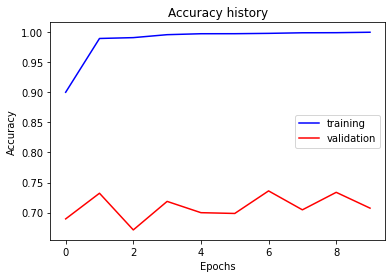

Learning Rate:  0.1
Weight Decay:  1e-08
Epoch:1 Train Loss:2.2759 Val Loss: 2.3074 Train Accuracy: 0.1229 Validation Accuracy: 0.0990
Epoch:2 Train Loss:2.3071 Val Loss: 2.3108 Train Accuracy: 0.1036 Validation Accuracy: 0.0990
Epoch:3 Train Loss:2.3062 Val Loss: 2.3073 Train Accuracy: 0.1063 Validation Accuracy: 0.1162
Epoch:4 Train Loss:2.3059 Val Loss: 2.3168 Train Accuracy: 0.1008 Validation Accuracy: 0.1005
Epoch:5 Train Loss:2.3074 Val Loss: 2.3119 Train Accuracy: 0.1041 Validation Accuracy: 0.1162
Epoch:6 Train Loss:2.3070 Val Loss: 2.3047 Train Accuracy: 0.1032 Validation Accuracy: 0.1162
Epoch:7 Train Loss:2.3055 Val Loss: 2.3037 Train Accuracy: 0.1035 Validation Accuracy: 0.1048
Epoch:8 Train Loss:2.3067 Val Loss: 2.3117 Train Accuracy: 0.1019 Validation Accuracy: 0.0932
Epoch:9 Train Loss:2.3062 Val Loss: 2.3080 Train Accuracy: 0.1050 Validation Accuracy: 0.0990
Epoch:10 Train Loss:2.3074 Val Loss: 2.3031 Train Accuracy: 0.1030 Validation Accuracy: 0.1162
Train Accuracy = 0

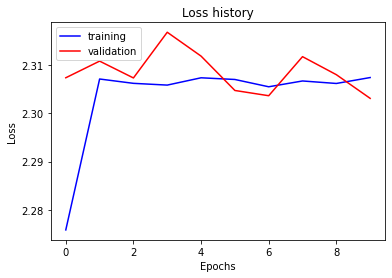

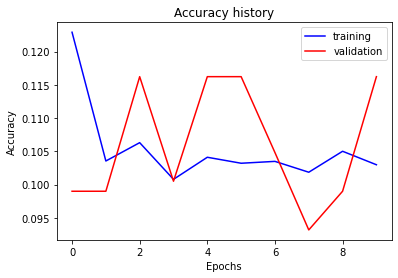

Learning Rate:  1e-05
Weight Decay:  1e-06
Epoch:1 Train Loss:2.3142 Val Loss: 2.3093 Train Accuracy: 0.1061 Validation Accuracy: 0.1012
Epoch:2 Train Loss:2.2987 Val Loss: 2.3003 Train Accuracy: 0.1212 Validation Accuracy: 0.1001
Epoch:3 Train Loss:2.2872 Val Loss: 2.2960 Train Accuracy: 0.1397 Validation Accuracy: 0.1117
Epoch:4 Train Loss:2.2750 Val Loss: 2.2910 Train Accuracy: 0.1559 Validation Accuracy: 0.1261
Epoch:5 Train Loss:2.2628 Val Loss: 2.2864 Train Accuracy: 0.1802 Validation Accuracy: 0.1220
Epoch:6 Train Loss:2.2510 Val Loss: 2.2817 Train Accuracy: 0.2090 Validation Accuracy: 0.1315
Epoch:7 Train Loss:2.2390 Val Loss: 2.2741 Train Accuracy: 0.2328 Validation Accuracy: 0.1446
Epoch:8 Train Loss:2.2257 Val Loss: 2.2706 Train Accuracy: 0.2584 Validation Accuracy: 0.1436
Epoch:9 Train Loss:2.2111 Val Loss: 2.2656 Train Accuracy: 0.2893 Validation Accuracy: 0.1461
Epoch:10 Train Loss:2.1931 Val Loss: 2.2592 Train Accuracy: 0.3239 Validation Accuracy: 0.1548
Train Accuracy =

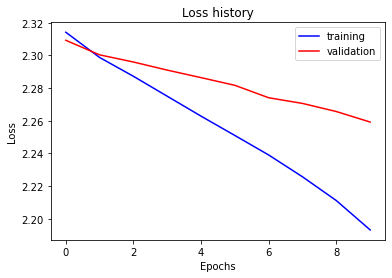

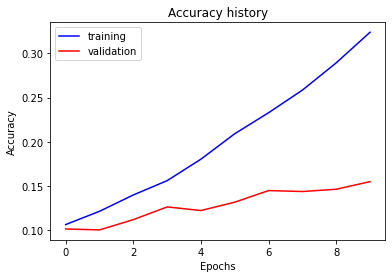

Learning Rate:  0.0001
Weight Decay:  1e-06
Epoch:1 Train Loss:2.2260 Val Loss: 2.2485 Train Accuracy: 0.2322 Validation Accuracy: 0.1558


In [ ]:
# GRID SEARCH
# optimizer_config = {"optimizer_type": "sgd", "lr": 1e-3, "weight_decay": 2.5e-2, "momentum": 0.9}
# regularizating: higher decay = punishing high weights more
weight_decays = [0, 1e-8, 1e-6, 1e-4]
learning_rates = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
# learning_rates = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2]


best_lr = None
best_weight_decay = None
best_val_acc = 0

for weight_decay in weight_decays:
  for learning_rate in learning_rates:
    
    optimizer_config = {"optimizer_type": "sgd", "lr": learning_rate, "weight_decay": weight_decay, "momentum": 0.9}
    
    my_resnet = MyResNet18()
    optimizer = get_optimizer(my_resnet, optimizer_config)

    trainer = Trainer(
        data_dir=data_path,
        model=my_resnet,
        optimizer=optimizer,
        model_dir=os.path.join(model_path, "resnet18"),
        train_data_transforms=get_all_transforms(inp_size, dataset_mean, dataset_std),
        val_data_transforms=get_fundamental_normalization_transforms(
            inp_size, dataset_mean, dataset_std),
        batch_size=32,
        load_from_disk=False,
        cuda=is_cuda,
)
    
    print("Learning Rate: ", learning_rate)
    print("Weight Decay: ", weight_decay)
    trainer.run_training_loop(num_epochs=10)
    train_accuracy = trainer.train_accuracy_history[-1]
    validation_accuracy = trainer.validation_accuracy_history[-1]
    print("Train Accuracy = {}; Validation Accuracy = {}".format(train_accuracy, validation_accuracy))
    
    if validation_accuracy > best_val_acc:
      best_lr = learning_rate
      best_weight_decay = weight_decay
      best_val_acc = validation_accuracy

    trainer.plot_loss_history()
    trainer.plot_accuracy()


print("best learning rate: ", best_lr)
print("best weight decay: ", best_weight_decay)
print("best validation accuracy: ", best_val_acc)

In [ ]:
trainer.validate()

Like both previous sections, you are required to pass a threshold of **85%** for this part. Copy the plots and values onto the report and answer questions accordingly.

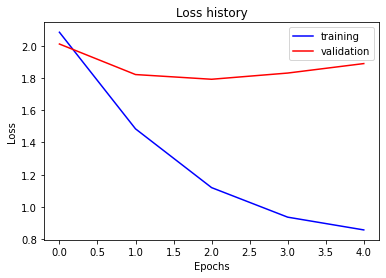

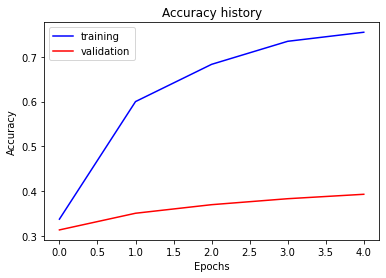

In [ ]:
trainer.plot_loss_history()
trainer.plot_accuracy()

In [ ]:
train_accuracy = trainer.train_accuracy_history[-1]
validation_accuracy = trainer.validation_accuracy_history[-1]
print(
    "Train Accuracy = {}; Validation Accuracy = {}".format(
        train_accuracy, validation_accuracy
    )
)

### Save Trained MyResnet18 model

In [ ]:
save_trained_model_weights(my_resnet, out_dir="./")

### Part 3.3 Visualize and Analyze Confusion Matrix

**TODO 17:** Visualize and analyze the confusion matrix.

You'll need to find an example of an image that is misclassified for the report. Use the confusion matrix and the `get_pred_images_for_target` function to help your analysis

In [ ]:
generate_and_plot_confusion_matrix(my_resnet, trainer.val_dataset, use_cuda=is_cuda)